## EE559 Assignment 2 : Classification using Logistic Regression, AReM Dataset

### @author : Suchismita Sahu, USCID : 7688176370

In [114]:
# Importing Libraries

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import os
from sklearn import datasets
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Q1.(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiple files each of which represents an instant of a humanperforming an activity. Each file containis 6 time series collected from activities of the same person. There are 88 instances in the dataset, each of which contains6 time series and each time series has 480 consecutive values.

In [4]:
#Reading the Data

path = os.getcwd()
path = os.path.join(path, 'AReM')
#print(os.listdir(path))

subdir = []

for folder in os.listdir(path):
    fullpath = os.path.join(path, folder)
    if folder.endswith(".pdf"):
        pass
    else:
        subdir.append(fullpath)

### Q1.(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [5]:
# Splitting the train and test data files

traindatapaths = []
testdatapaths = []

for folder in subdir:
    if len(os.listdir(folder)) < 10:
#        print(folder)
        for count, data in enumerate(os.listdir(folder)):
            if count < 2:
                testdatapaths.append(os.path.join(folder, data))
            else:
                traindatapaths.append(os.path.join(folder, data))
    else:
        for count, data in enumerate(os.listdir(folder)):
            if count < 3:
                testdatapaths.append(os.path.join(folder, data))
            else:
                traindatapaths.append(os.path.join(folder, data))
                                    
#print(testdatapaths)
#print(traindatapaths)

### Q1(c). Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features. 

### Q.1(c).i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

In [20]:
# Splitting Train and Test Data
data =[]

for folder in subdir:
    #print(path)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        newPath = path.replace(os.sep, '/')
        #print(newPath)
        data.append(newPath)
                
# Putting All data instances together
Alldata = pd.DataFrame() 
for dataset in data:
    df = pd.read_csv(dataset, header=4)
    Alldata = pd.concat([Alldata, df],ignore_index=True)

#TrainingData = pd.DataFra

### Q1.(c).ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.2 Your new dataset will look like this: Instance min1 max1 mean1 median1 .... 1st quart6 3rd quart6. where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [7]:
# Creating new dataset of statistics features of the instances

stats = np.empty((1, 42))
for instances in data:
    df2 = pd.read_csv(instances, comment='#', header=None)
    df2 = df2.drop([0], axis=1)
    minimum = df2.min()
    maximum = df2.max()
    mean = df2.mean()
    median = df2.median()
    firstquartile = df2.quantile(q = .25)
    standarddev = df2.std()
    thirdquartile = df2.quantile(q = .75)
    data_temp = np.array([minimum, maximum, mean, median, standarddev,firstquartile,thirdquartile]).reshape((1,42))
    stats = np.vstack((stats, data_temp))
    
stats = stats[1:]

newdataset = pd.DataFrame(stats)
newdataset.columns=["min1","max1","mean1","median1","standarddev1","1stQuart1","3rdQuart1","min2","max2","mean2","median2","standarddev2","1stQuart2","3rdQuart2", "min3","max3","mean3","median3","standarddev3","1stQuart3","3rdQuart3","min4","max4","mean4","median4","standarddev4","1stQuart4","3rdQuart4", "min5","max5","mean5","median5","standarddev5","1stQuart5","3rdQuart5", "min6","max6","mean6","median6","standarddev6","1stQuart6","3rdQuart6"]
# print(newdataset)

### Q1.(c).iii. Use your judgement to select the three most important time-domain features.

After research, I am taking Mean, Standard Deviation and Third Quartile as the most important time-domain features.

### Binary Classification Using Logistic Regression3 

### Q1(d).i. Assume that you want to use the training set to classify bending from otheractivities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iii extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

Displaying Scatterplot of Selected Features


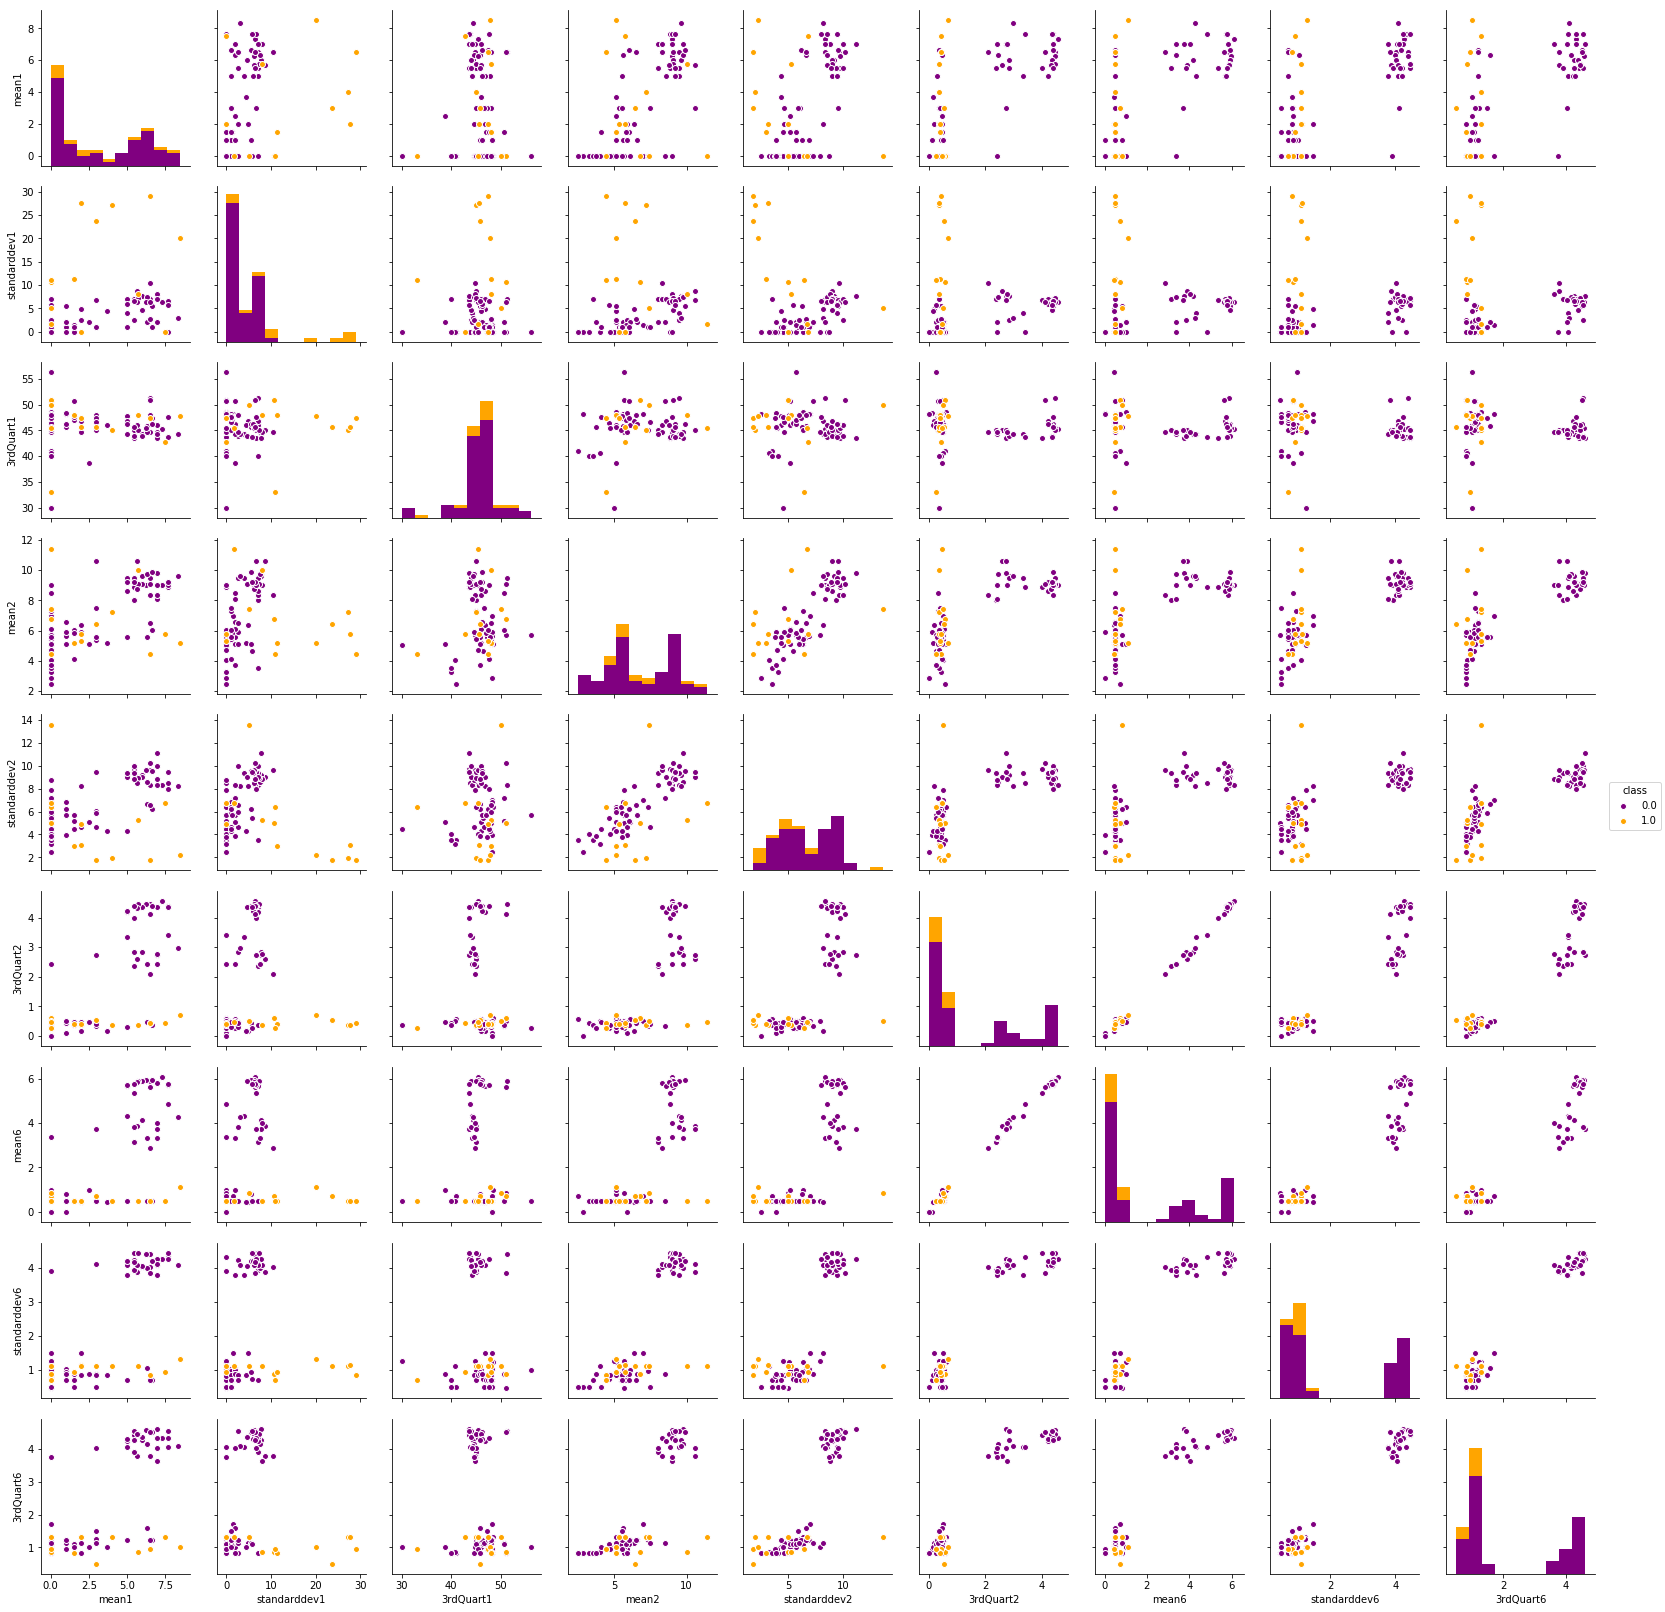

In [8]:
stats = np.empty((1, 43))
for instances in testdatapaths+traindatapaths:
    if 'bending' in instances:
        class_type= 1
    else:
        class_type= 0
    df2 = pd.read_csv(instances, comment='#', header=None)
    df2 = df2.drop([0], axis=1)
    minimum = df2.min()
    maximum = df2.max()
    mean = df2.mean()
    median = df2.median()
    firstquartile = df2.quantile(q = .25)
    standarddev = df2.std()
    thirdquartile = df2.quantile(q = .75)
    data_temp = np.array([minimum, maximum, mean, median, standarddev,firstquartile,thirdquartile]).reshape((1,42))
    data_temp = np.append(data_temp,class_type)
    stats = np.vstack((stats, data_temp))
    
stats = stats[1:]

newdataset = pd.DataFrame(stats)
newdataset.columns=["min1","max1","mean1","median1","standarddev1","1stQuart1","3rdQuart1","min2","max2","mean2","median2","standarddev2","1stQuart2","3rdQuart2", "min3","max3","mean3","median3","standarddev3","1stQuart3","3rdQuart3","min4","max4","mean4","median4","standarddev4","1stQuart4","3rdQuart4", "min5","max5","mean5","median5","standarddev5","1stQuart5","3rdQuart5", "min6","max6","mean6","median6","standarddev6","1stQuart6","3rdQuart6","class"]
# print(newdataset)

# Plotting the Scatterplot

#selectedfeatures = newdataset[['mean1', 'standarddev1', '3rdQuart1','mean2', 'standarddev2', '3rdQuart2', 'mean3', 'standarddev3', '3rdQuart3']]
colors = ['purple', 'orange']
print('Displaying Scatterplot of Selected Features')
sns.pairplot(data=newdataset, hue='class', palette= colors, vars= ['mean1', 'standarddev1', '3rdQuart1','mean2', 'standarddev2', '3rdQuart2', 'mean6', 'standarddev6', '3rdQuart6'], diag_kind='hist')



### Q.1(d).ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 6 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?

Displaying Scatterplot of Selected Features of the new double instances dataset


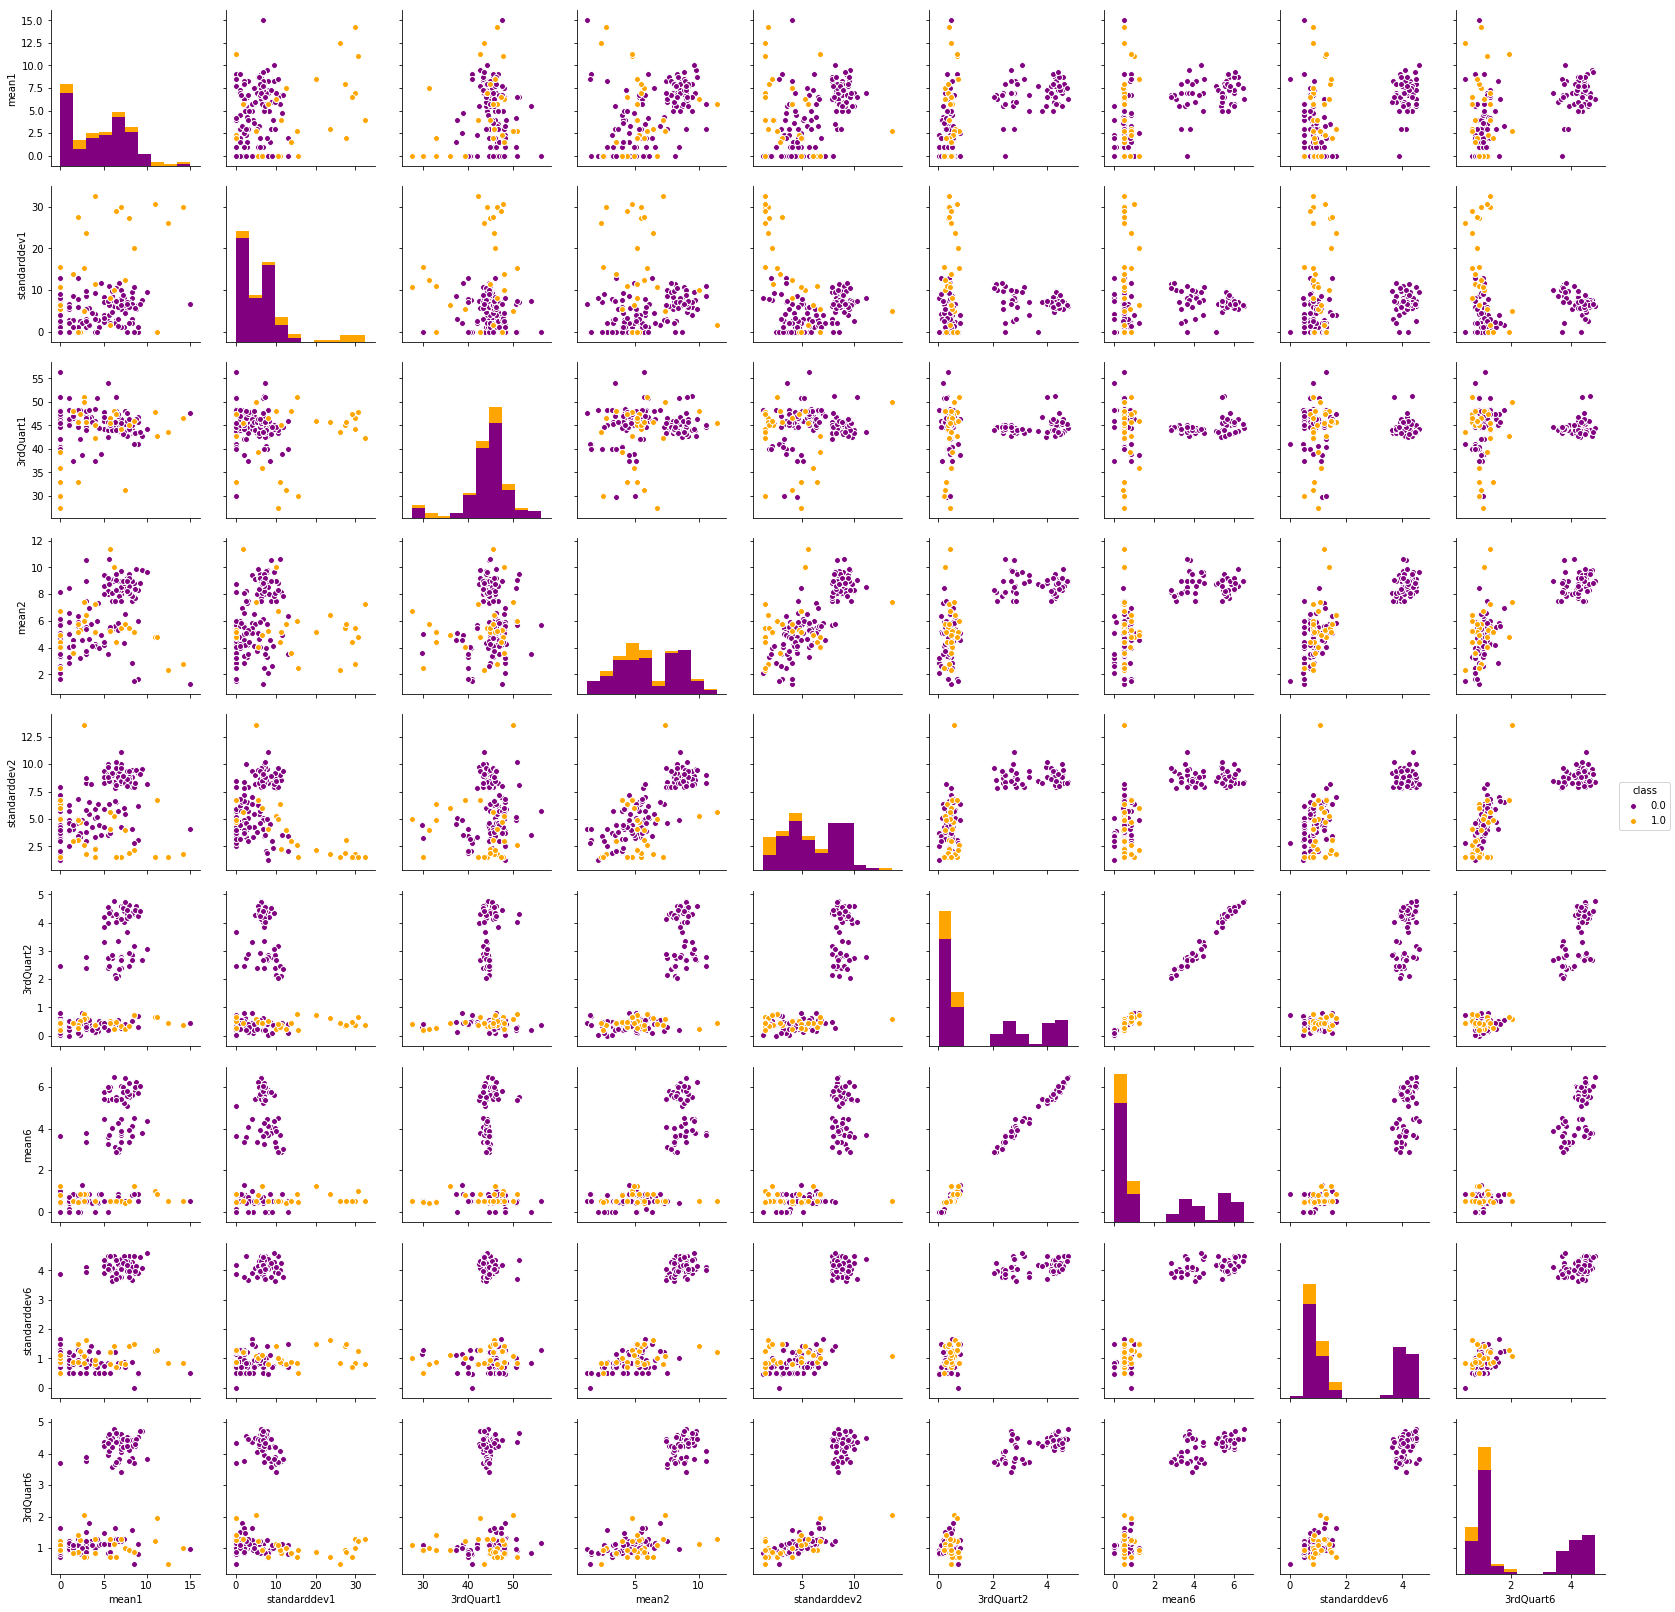

In [9]:
stats1 = np.empty((1, 43))
stats2 = np.empty((1, 43))
for dataset in data:
    if 'bending' in dataset:
        class_type= 1
    else:
        class_type= 0
    df3 = pd.read_csv(dataset, comment='#', header=None)
    df3 = df3.drop([0], axis=1)
    
    firsthalf = df3.head(n=240)
    secondhalf = df3.iloc[240:,:]
    
    minimum1 = firsthalf.min()
    minimum2 = secondhalf.min()
    maximum1 = firsthalf.max()
    maximum2 = secondhalf.max()
    mean1 = firsthalf.mean()
    mean2 = secondhalf.mean()
    median1 = firsthalf.mean()
    median2 = secondhalf.median()
    firstquartile1 = firsthalf.quantile(q = .25)
    firstquartile2 = secondhalf.quantile(q = .25)
    standarddev1 = firsthalf.std()
    standarddev2 = secondhalf.std()
    thirdquartile1 = firsthalf.quantile(q = .75)
    thirdquartile2 = secondhalf.quantile(q = .75)
    data_temp1 = np.array([minimum1, maximum1, mean1, median1, standarddev1,firstquartile1,thirdquartile1]).reshape((1,42))
    data_temp1 = np.append(data_temp1,class_type)
    data_temp2 = np.array([minimum2, maximum2, mean2, median2, standarddev2,firstquartile2,thirdquartile2]).reshape((1,42))
    data_temp2 = np.append(data_temp2,class_type)
    stats1 = np.vstack((stats1, data_temp1))
    stats2 = np.vstack((stats2, data_temp2))
    
stats1 = stats1[1:]
stats2 = stats2[1:]

newdataset1 = pd.DataFrame(stats1)
newdataset1.columns=["min1","max1","mean1","median1","standarddev1","1stQuart1","3rdQuart1","min2","max2","mean2","median2","standarddev2","1stQuart2","3rdQuart2", "min3","max3","mean3","median3","standarddev3","1stQuart3","3rdQuart3","min4","max4","mean4","median4","standarddev4","1stQuart4","3rdQuart4", "min5","max5","mean5","median5","standarddev5","1stQuart5","3rdQuart5", "min6","max6","mean6","median6","standarddev6","1stQuart6","3rdQuart6","class"]

newdataset2 = pd.DataFrame(stats2)
newdataset2.columns=["min1","max1","mean1","median1","standarddev1","1stQuart1","3rdQuart1","min2","max2","mean2","median2","standarddev2","1stQuart2","3rdQuart2", "min3","max3","mean3","median3","standarddev3","1stQuart3","3rdQuart3","min4","max4","mean4","median4","standarddev4","1stQuart4","3rdQuart4", "min5","max5","mean5","median5","standarddev5","1stQuart5","3rdQuart5", "min6","max6","mean6","median6","standarddev6","1stQuart6","3rdQuart6","class"]

frames = [newdataset1, newdataset2]
doubleinstancesdataset = pd.concat(frames)

#print(doubleinstancesdataset.shape)

#print(newdataset1)
#print(newdataset2)

# Printing new 

colors = ['purple', 'orange']
print('Displaying Scatterplot of Selected Features of the new double instances dataset')
sns.pairplot(data=doubleinstancesdataset, hue='class', palette= colors, vars= ['mean1', 'standarddev1', '3rdQuart1','mean2', 'standarddev2', '3rdQuart2', 'mean6', 'standarddev6', '3rdQuart6'], diag_kind='hist')


### Q.1(d).iii. Break each time series in your training set into l = (1, 2...20) time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features. Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [78]:
# Logistic Regression on Training Data using the Time Domain features.

length=480
groups=[i for i in range(1,21)]

cross_val_scores=[]
best_features=[]
features=[]

for grp in groups:
    time_features = pd.DataFrame()
    label = []
    for j in range(len(traindatapaths)):
        training = pd.read_csv(traindatapaths[j], comment='#', header=None)
        if (j in [0,1,2,3,4,5,6,7,8]):
            label.append([1]*grp)
        else:
            label.append([0]*grp)
        for i in range(grp):
            if (i == grp-1):
                third = training[i*int(length/grp):]
            else:
                third = training[i*int(length/grp):(i+1)*int(length/grp)]
            minimum = np.amin(np.array(third)[:,1:],axis=0)
            maximum = np.amax(np.array(third)[:,1:],axis=0)
            mean = np.mean(np.array(third)[:,1:],axis=0)
            median = np.median(np.array(third)[:,1:],axis=0)
            stddev = np.std(np.array(third)[:,1:],axis=0)
            first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
            third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
            time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)
    
    time_features = np.array(time_features)
    label = np.array(label).reshape(-1)
    model = LogisticRegression()
    rfe = RFECV(model,step = 1,cv = 5)
    rfe = rfe.fit(time_features,label)
    #print(rfe.support_)
    #print(rfe.ranking_)
    cross_val_scores.append(rfe.grid_scores_[rfe.n_features_-1])
    feature_reduced = []
    features.append(rfe.grid_scores_)
    for i in range(len(rfe.support_)):
        if (rfe.support_[i]==True):
            feature_reduced.append(i)
    best_features.append(feature_reduced)
    

l_value=(cross_val_scores.index(max(cross_val_scores))+1)
print("The best value of L is : %d" %l_value )            
print("Optimal cv score is or Training Score:" , max(cross_val_scores))
print("Optimal number of features : %d" % rfe.n_features_)
#print("The features are:", best_features[l_value-1])

The best value of L is : 1
Optimal cv score is or Training Score: 0.9857142857142858
Optimal number of features : 16


### Q1.(d).iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression Beta-i's as well as the p-values associated with them.

The Classification Accuracy is : 1.000000
The Confusion Matrix is :
[[60  0]
 [ 0  9]]
False Positive Rate: 0.0
True Positive Rate: 1.0
The AUC Score is : 1.000000

 Coefficient Beta Values are :
 [[-1.21610819e-01  0.00000000e+00 -8.15349774e-02  0.00000000e+00
   3.98182173e-01 -3.44276822e-05  1.60360795e-03 -2.52630455e-01
   1.68080416e-01  5.58582018e-02  5.36490910e-01 -2.00725263e-01
  -1.37881367e-01 -8.00313128e-02 -6.91220755e-02 -7.74564018e-02
   2.02199602e-01 -8.87281581e-02 -2.99368164e-02 -4.08784679e-02
  -1.68225783e-01 -8.56109247e-02  9.86611757e-02 -8.61728980e-02
  -5.12986892e-02 -5.77146095e-02 -4.27348443e-02 -2.23652652e-02
  -2.85752963e-02 -4.67108418e-02 -6.16682966e-02 -3.52303785e-02
   2.46971713e-02 -5.23795570e-02  2.16120993e-01 -6.92542704e-02
  -2.99260890e-01 -1.31183420e-01 -1.69645750e-01 -1.01776040e-01
   1.02322817e-01 -1.17888472e-01]]


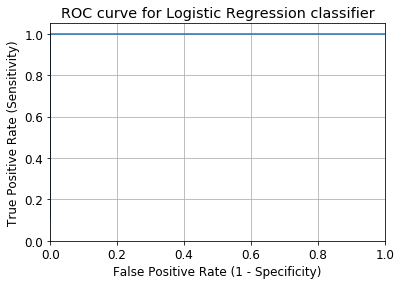

In [79]:
# Predicting using the optimum l value on training data using the Classifier

length=480
cross_val_scores=[]
best_features=[]
features=[]

time_features = pd.DataFrame()
label = []
for j in range(len(traindatapaths)):
    training = pd.read_csv(traindatapaths[j], comment='#', header=None)
    if (j in [0,1,2,3,4,5,6,7,8]):
        label.append([1]*l_value)
    else:
        label.append([0]*l_value)
    for i in range(l_value):
        if (i == l_value-1):
            third = training[i*int(length/l_value):]
        else:
            third = training[i*int(length/l_value):(i+1)*int(length/l_value)]
        minimum = np.amin(np.array(third)[:,1:],axis=0)
        maximum = np.amax(np.array(third)[:,1:],axis=0)
        mean = np.mean(np.array(third)[:,1:],axis=0)
        median = np.median(np.array(third)[:,1:],axis=0)
        stddev = np.std(np.array(third)[:,1:],axis=0)
        first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
        third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
        time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)
    
time_features = np.array(time_features)
label = np.array(label).reshape(-1)

model = LogisticRegression()

model.fit(time_features,label)

Y_pred = model.predict(time_features)

print("The Classification Accuracy is : %f" %metrics.accuracy_score(label, Y_pred))
print("The Confusion Matrix is :")
cm = metrics.confusion_matrix(label, Y_pred)
print(cm)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

TPR = TP/(TP+FN)
false_positive_rate = FP / float(TN + FP)
y_pred_prob = model.predict_proba(time_features)[:, 1]
print('False Positive Rate:',false_positive_rate)
print('True Positive Rate:', TPR)

fpr, tpr, thresholds = metrics.roc_curve(label, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print("The AUC Score is : %f" %metrics.roc_auc_score(label, y_pred_prob))

Beta_values = model.coef_
print('\n Coefficient Beta Values are :\n', Beta_values)

#p_values = 


### Q1.(d).v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [82]:
length=480
cross_val_scores=[]
best_features=[]
features=[]

time_features = pd.DataFrame()
label = []
for j in range(len(testdatapaths)):
    training = pd.read_csv(testdatapaths[j], comment='#', header=None)
    if (j in [0,1,2,3,4,5,6,7,8]):
        label.append([1]*l_value)
    else:
        label.append([0]*l_value)
    for i in range(l_value):
        if (i == l_value-1):
            third = training[i*int(length/l_value):]
        else:
            third = training[i*int(length/l_value):(i+1)*int(length/l_value)]
        minimum = np.amin(np.array(third)[:,1:],axis=0)
        maximum = np.amax(np.array(third)[:,1:],axis=0)
        mean = np.mean(np.array(third)[:,1:],axis=0)
        median = np.median(np.array(third)[:,1:],axis=0)
        stddev = np.std(np.array(third)[:,1:],axis=0)
        first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
        third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
        time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)
    
time_features = np.array(time_features)
label = np.array(label).reshape(-1)

model = LogisticRegression()

model.fit(time_features,label)

Y_pred = model.predict(time_features)

print("The Classification Accuracy is : %f" %metrics.accuracy_score(label, Y_pred))

print("The Confusion Matrix is :")
cm = metrics.confusion_matrix(label, Y_pred)
print(cm)

The Classification Accuracy is : 1.000000
The Confusion Matrix is :
[[10  0]
 [ 0  9]]


Comparing this Classification Accuracy with the Cross-Validation Accuracy I recorded previously to be 0.9857, we see that the Classification accuracy on test data is more. 

### Q1.(d).vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes, the classes seem to cause instability in calculating the logistic regression parameters. 

### Q1.(d).vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, we see imbalanced Classes from the confusion matrices obtained. We have to build a logistic regression model based on case-control sampling. 

The Confusion Matrix is :
[[9 0]
 [0 9]]
False Positive Rate: 0.0
True Positive Rate: 1.0
The AUC Score is : 1.000000


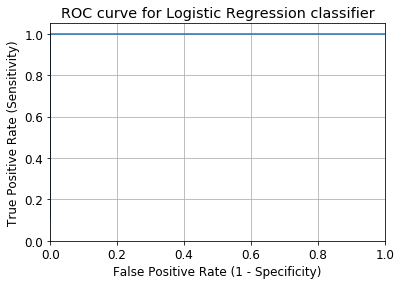

In [91]:
# Logistic Regression Model based on Case-Control Sampling
 
Randomsampler = RandomUnderSampler()
X, Y = Randomsampler.fit_sample(time_features, label)
model = LogisticRegression()
model.fit(X,Y)
predicted = model.predict(X)
print("The Confusion Matrix is :")
cm = metrics.confusion_matrix(Y, predicted)
print(cm)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

TPR = TP/(TP+FN)
false_positive_rate = FP / float(TN + FP)
y_pred_prob = model.predict_proba(X)[:, 1]
print('False Positive Rate:',false_positive_rate)
print('True Positive Rate:', TPR)

fpr, tpr, thresholds = metrics.roc_curve(Y, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print("The AUC Score is : %f" %metrics.roc_auc_score(Y, y_pred_prob))


## Q1.(e) Binary Classification Using L1-penalized logistic regression

### Q1.(e).i. Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and Lambda, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for Lambda automatically.
### Q1.(e).ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [102]:
# Logistic Regression on Training Data using the Time Domain features: L1-Penalized Logistic Regression


# Finding the Optimum L-value first
length=480
groups=[i for i in range(1,21)]

cross_val_scores=[]
best_features=[]
features=[]

for grp in groups:
    time_features = pd.DataFrame()
    label = []
    for j in range(len(traindatapaths)):
        training = pd.read_csv(traindatapaths[j], comment='#', header=None)
        if (j in [0,1,2,3,4,5,6,7,8]):
            label.append([1]*grp)
        else:
            label.append([0]*grp)
        for i in range(grp):
            if (i == grp-1):
                third = training[i*int(length/grp):]
            else:
                third = training[i*int(length/grp):(i+1)*int(length/grp)]
            minimum = np.amin(np.array(third)[:,1:],axis=0)
            maximum = np.amax(np.array(third)[:,1:],axis=0)
            mean = np.mean(np.array(third)[:,1:],axis=0)
            median = np.median(np.array(third)[:,1:],axis=0)
            stddev = np.std(np.array(third)[:,1:],axis=0)
            first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
            third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
            time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)

    
    time_features = np.array(time_features)
    label = np.array(label).reshape(-1)
    model = LogisticRegressionCV(cv=5, penalty='l1', solver='saga')
    model.fit(time_features,label)
    Y_pred = model.predict(time_features)
    cross_val_scores.append(np.mean(cross_val_score(model,time_features, label)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [106]:
# Fitting the Logistic Regression again for the best L-value

length=480
cross_val_scores=[]
best_features=[]
features=[]

time_features = pd.DataFrame()
label = []
for j in range(len(traindatapaths)):
    training = pd.read_csv(traindatapaths[j], comment='#', header=None)
    if (j in [0,1,2,3,4,5,6,7,8]):
        label.append([1]*l_value)
    else:
        label.append([0]*l_value)
    for i in range(l_value):
        if (i == l_value-1):
            third = training[i*int(length/l_value):]
        else:
            third = training[i*int(length/l_value):(i+1)*int(length/l_value)]
        minimum = np.amin(np.array(third)[:,1:],axis=0)
        maximum = np.amax(np.array(third)[:,1:],axis=0)
        mean = np.mean(np.array(third)[:,1:],axis=0)
        median = np.median(np.array(third)[:,1:],axis=0)
        stddev = np.std(np.array(third)[:,1:],axis=0)
        first_quart = np.percentile(np.array(third)[:,1:],25,axis=0)
        third_quart = np.percentile(np.array(third)[:,1:],75,axis=0)
        time_features = time_features.append(pd.DataFrame(np.concatenate((minimum,maximum,mean,median,stddev,first_quart,third_quart),axis=0)).T)
    
time_features = np.array(time_features)
label = np.array(label).reshape(-1)

model = LogisticRegressionCV(cv=5, penalty='l1', solver='saga')

model.fit(time_features,label)

Y_pred = model.predict(time_features)

print("The Classification Accuracy is : %f" %metrics.accuracy_score(label, Y_pred))

print("The Confusion Matrix is :")
cm = metrics.confusion_matrix(label, Y_pred)
print(cm) 

The Classification Accuracy is : 1.000000
The Confusion Matrix is :
[[60  0]
 [ 0  9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Q1.(f) Multi-class Classification (The Realistic Case)

### Q1.(f).i. Find the best l in the same way as you found it in 1(e)i to build an L1-penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible

### Q1.(f).ii. Repeat 1(f)i using a Naive Bayes' classifier. Use both Gaussian and Multinomial priors and compare the results.

In [ ]:
# Multi-Class Classification using L1-Penalized Multinomial Regression Model

models=[]
length=480
groups=[i for i in range(1,21)]
crossval_score=[]

for grp in groups:
    time_features=pd.DataFrame()
    label=[]
    for j in range(len(traindatapaths)):
        training = pd.read_csv(traindatapaths[j], comment='#', header=None)
        if (j in [0,1,2,3,4,5,6,7,8]):
            label.extend([0]*grp)
        elif (j in range(9,21)):
            label.extend([1]*grp)
        elif (j in range(21,33)):
            label.extend([2]*grp)
        elif (j in range(33,45)):
            label.extend([3]*grp)
        elif (j in range(45,57)):
            label.extend([4]*grp)
        else:
            label.extend([5]*grp)
             
        for i in range(grp):
            third=training[i*int(length/grp):i*int(length/grp)+int(length/grp)]
            mini=np.amin(np.array(third)[:,1:],axis=0)
            maxi=np.amax(np.array(third)[:,1:],axis=0)
            mean=np.mean(np.array(third)[:,1:],axis=0)
            median=np.median(np.array(third)[:,1:],axis=0)
            std=np.std(np.array(third)[:,1:],axis=0)
            first_quart=np.percentile(np.array(third)[:,1:],25,axis=0)
            third_quart=np.percentile(np.array(third)[:,1:],75,axis=0)
            time_features=time_features.append(pd.DataFrame(np.concatenate((mini,maxi,mean,median,std,first_quart,third_quart),axis=0)).T)
    time_features=np.array(time_features)
    label=np.array(label).reshape(-1)
    model=LogisticRegressionCV(penalty='l1',multi_class='multinomial',solver='saga')
    model.fit(time_features,label)
    models.append(model)
    crossval_score.append(np.mean(cross_val_score(model,time_features,label)))

l_value=(crossval_score.index(max(crossval_score))+1)
print("\n The best l-value for multinomial L1 Penalized Regression is %d and corresponding score is %.4f" %(l_value,max(crossval_score)))


label=[]
time_features=[]
for j in range(len(testdatapaths)):

    testing = pd.read_csv(testdatapaths[j], comment='#', header=None)
    if (j in [0,1,2,3]):
        label.extend([0]*l_value)
    elif(j in range(4,7)):
        label.extend([1]*l_value)
    elif(j in range(7,10)):
        label.extend([2]*l_value)
    elif(j in range(10,13)):
        label.extend([3]*l_value)
    elif(j in range(13,16)):
        label.extend([4]*l_value)
    else:
        label.extend([5]*l_value)
    for i in range(l_value):
        fifth=testing[i*int(length/grp):(i+1)*int(length/grp)]
        mini=np.amin(np.array(fifth)[:,1:],axis=0)
        maxi=np.amax(np.array(fifth)[:,1:],axis=0)
        mean=np.mean(np.array(fifth)[:,1:],axis=0)
        median=np.median(np.array(fifth)[:,1:],axis=0)
        std=np.std(np.array(fifth)[:,1:],axis=0)
        first_quart=np.percentile(np.array(fifth)[:,1:],25,axis=0)
        third_quart=np.percentile(np.array(fifth)[:,1:],75,axis=0)
        time_features.append(np.concatenate((mini,maxi,mean,median,std,first_quart,third_quart)))

time_features=np.array(time_features)
label=np.array(label).reshape(-1)
predicted_label=models[l_value-1].predict(time_features)
test_error = 1- accuracy_score(label,predicted_label)
print('\n Test error for multinomial L1 penalized classifier is : ', test_error)
conf_matrix = confusion_matrix(label,predicted_label)
print("\n The confusion matrix is : \n",conf_matrix)
y_score=models[l_value-1].decision_function(time_features)
label=label_binarize(label,classes=[0,1,2,3,4,5])
fpr=dict()
tpr=dict()
roc_auc=dict()
colors=['blue','orange','cornflowerblue','red','green','yellow']
plt.figure()
for i,color in zip(range(6),colors):
    fpr[i],tpr[i],_=roc_curve(label[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    plt.plot(fpr[i],tpr[i],color=color,label='ROC curve area = %.2f' %roc_auc[i])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

In [ ]:
# Multinomial Classification Using Naive Bayes' classifier: Both Gaussian and Multinomial priors

#Naive Baye's MultinomialNB

models=[]
length=480
groups=[i for i in range(1,21)]
crossval_score=[]

for grp in groups:
    time_features=pd.DataFrame()
    label=[]
    for j in range(len(traindatapaths)):
        training = pd.read_csv(traindatapaths[j], comment='#', header=None)
        if (j in [0,1,2,3,4,5,6,7,8]):
            label.extend([0]*grp)
        elif (j in range(9,21)):
            label.extend([1]*grp)
        elif (j in range(21,33)):
            label.extend([2]*grp)
        elif (j in range(33,45)):
            label.extend([3]*grp)
        elif (j in range(45,57)):
            label.extend([4]*grp)
        else:
            label.extend([5]*grp)
             
        for i in range(grp):
            third=training[i*int(length/grp):i*int(length/grp)+int(length/grp)]
            mini=np.amin(np.array(third)[:,1:],axis=0)
            maxi=np.amax(np.array(third)[:,1:],axis=0)
            mean=np.mean(np.array(third)[:,1:],axis=0)
            median=np.median(np.array(third)[:,1:],axis=0)
            std=np.std(np.array(third)[:,1:],axis=0)
            first_quart=np.percentile(np.array(third)[:,1:],25,axis=0)
            third_quart=np.percentile(np.array(third)[:,1:],75,axis=0)
            time_features=time_features.append(pd.DataFrame(np.concatenate((mini,maxi,mean,median,std,first_quart,third_quart),axis=0)).T)
    time_features=np.array(time_features)
    label=np.array(label).reshape(-1)
    model=MultinomialNB()
    model.fit(time_features,label)
    models.append(model)
    crossval_score.append(np.mean(cross_val_score(model,time_features,label)))

l_value=(crossval_score.index(max(crossval_score))+1)
print("\n The best l-value for Naive Baye's Classifier is %d and corresponding score is %.4f" %(l_value,max(cv_score)))


label=[]
time_features=[]
for j in range(len(testdatapaths)):

    testing = pd.read_csv(testdatapaths[j], comment='#', header=None)
    if (j in [0,1,2,3]):
        label.extend([0]*l_value)
    elif(j in range(4,7)):
        label.extend([1]*l_value)
    elif(j in range(7,10)):
        label.extend([2]*l_value)
    elif(j in range(10,13)):
        label.extend([3]*l_value)
    elif(j in range(13,16)):
        label.extend([4]*l_value)
    else:
        label.extend([5]*l_value)
    for i in range(l_value):
        fifth=testing[i*int(length/grp):(i+1)*int(length/grp)]
        mini=np.amin(np.array(fifth)[:,1:],axis=0)
        maxi=np.amax(np.array(fifth)[:,1:],axis=0)
        mean=np.mean(np.array(fifth)[:,1:],axis=0)
        median=np.median(np.array(fifth)[:,1:],axis=0)
        std=np.std(np.array(fifth)[:,1:],axis=0)
        first_quart=np.percentile(np.array(fifth)[:,1:],25,axis=0)
        third_quart=np.percentile(np.array(fifth)[:,1:],75,axis=0)
        time_features.append(np.concatenate((mini,maxi,mean,median,std,first_quart,third_quart)))
time_features=np.array(time_features)
label=np.array(label).reshape(-1)
predicted_label=models[l_value-1].predict(time_features)
test_error = 1- accuracy_score(label,predicted_label)
print('\n Test error for Naive Baye\'s using Multinomial Prior is : ', test_error)
conf_matrix = confusion_matrix(label,predicted_label)
print("\n The confusion matrix is : \n",conf_matrix)
y_score=models[l_value-1].predict_proba(time_features)
label=label_binarize(label,classes=[0,1,2,3,4,5])
fpr=dict()
tpr=dict()
roc_auc=dict()
colors=['aqua','darkorange','cornflowerblue','red','green','yellow']
plt.figure()
for i,color in zip(range(6),colors):
    fpr[i],tpr[i],_=roc_curve(label[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    plt.plot(fpr[i],tpr[i],color=color,label='ROC curve area = %.2f' %roc_auc[i])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Q1.(f).iii. Which method is better for multi-class classification in this problem?

Based on Test errors computed for all the three, L1-penalized multinomial regression model has the least test error and hence is Better. 